In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0 
x_test = x_test / 255.0

def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  
    ])
    return model

optimizers = {
    "SGD": SGD(),
    "Adam": Adam(),
    "RMSprop": RMSprop(),
    "Adagrad": Adagrad(),
}

batch_sizes = {
    "SGD": 32,
    "Adam": 32,
    "RMSprop": 32,
    "Adagrad": 32,

}

histories = {}

for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer (batch_size={batch_sizes[name]})")
    model = build_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, 
                       epochs=5, 
                       batch_size=batch_sizes[name], 
                       )
    histories[name] = history


Training with SGD optimizer (batch_size=32)


c:\Users\ganes\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7372 - loss: 1.0313
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9029 - loss: 0.3519
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9166 - loss: 0.2980
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9250 - loss: 0.2671
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9338 - loss: 0.2363

Training with Adam optimizer (batch_size=32)
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8775 - loss: 0.4309
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9662 - loss: 0.1164
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9763 - loss: 0.0788
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9827 - loss: 0.0570
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9862 - loss: 0.0447

Training with RMSprop optimizer (batch_size=32)
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━

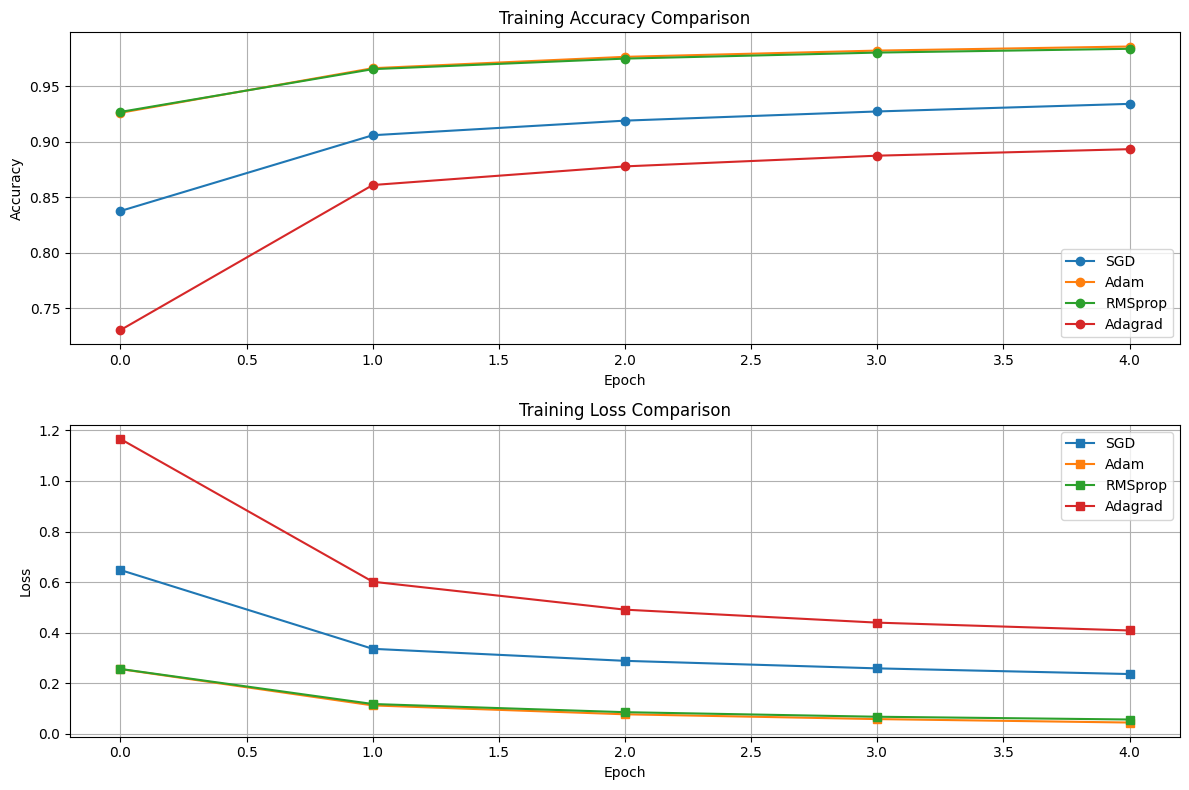


Final Training Accuracy:
SGD: 0.9343
Adam: 0.9860
RMSprop: 0.9840
Adagrad: 0.8934


In [2]:
plt.figure(figsize=(12, 8))

# Plot training accuracy
plt.subplot(2, 1, 1)
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=name, marker='o')

plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Plot training loss
plt.subplot(2, 1, 2)
for name, history in histories.items():
    plt.plot(history.history['loss'], label=name, marker='s')

plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final accuracy for each optimizer
print("\nFinal Training Accuracy:")
for name, history in histories.items():
    final_acc = history.history['accuracy'][-1]
    print(f"{name}: {final_acc:.4f}")

In [3]:
# Additional analysis after training
print("\n" + "="*50)
print("DETAILED OPTIMIZER ANALYSIS")
print("="*50)

# Calculate convergence metrics
for name, history in histories.items():
    acc_history = history.history['accuracy']
    loss_history = history.history['loss']
    
    print(f"\n{name} Optimizer:")
    print(f"  Initial Accuracy: {acc_history[0]:.4f}")
    print(f"  Final Accuracy: {acc_history[-1]:.4f}")
    print(f"  Accuracy Improvement: {acc_history[-1] - acc_history[0]:.4f}")
    print(f"  Final Loss: {loss_history[-1]:.4f}")
    print(f"  Convergence Rate: {(acc_history[-1] - acc_history[0])/len(acc_history):.4f} per epoch")

# Find best performing optimizer
best_optimizer = max(histories.keys(), key=lambda x: histories[x].history['accuracy'][-1])
print(f"\nBest Performing Optimizer: {best_optimizer}")
print(f"Best Final Accuracy: {histories[best_optimizer].history['accuracy'][-1]:.4f}")


DETAILED OPTIMIZER ANALYSIS

SGD Optimizer:
  Initial Accuracy: 0.8376
  Final Accuracy: 0.9343
  Accuracy Improvement: 0.0967
  Final Loss: 0.2362
  Convergence Rate: 0.0193 per epoch

Adam Optimizer:
  Initial Accuracy: 0.9262
  Final Accuracy: 0.9860
  Accuracy Improvement: 0.0598
  Final Loss: 0.0443
  Convergence Rate: 0.0120 per epoch

RMSprop Optimizer:
  Initial Accuracy: 0.9270
  Final Accuracy: 0.9840
  Accuracy Improvement: 0.0569
  Final Loss: 0.0564
  Convergence Rate: 0.0114 per epoch

Adagrad Optimizer:
  Initial Accuracy: 0.7302
  Final Accuracy: 0.8934
  Accuracy Improvement: 0.1632
  Final Loss: 0.4085
  Convergence Rate: 0.0326 per epoch

Best Performing Optimizer: Adam
Best Final Accuracy: 0.9860
